In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipaddress

plt.style.use("seaborn-v0_8")


In [2]:
fraud_df = pd.read_csv("../data/raw/Fraud_Data.csv")
ip_df = pd.read_csv("../data/raw/IpAddress_to_Country.csv")

fraud_df.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [3]:
fraud_df.shape
fraud_df.info()
fraud_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [4]:
fraud_df.isnull().sum()
fraud_df.duplicated().sum()
fraud_df.drop_duplicates(inplace=True)
fraud_df.dropna(inplace=True)


In [5]:
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])


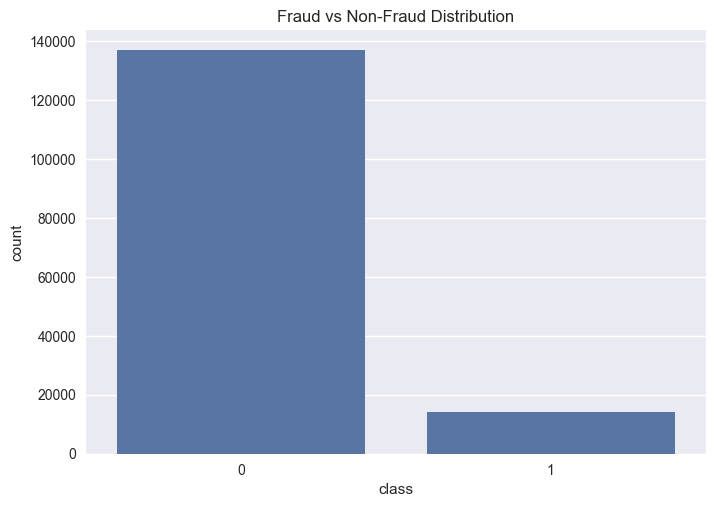

In [6]:
fraud_df['class'].value_counts()
fraud_df['class'].value_counts(normalize=True)
sns.countplot(x='class', data=fraud_df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()


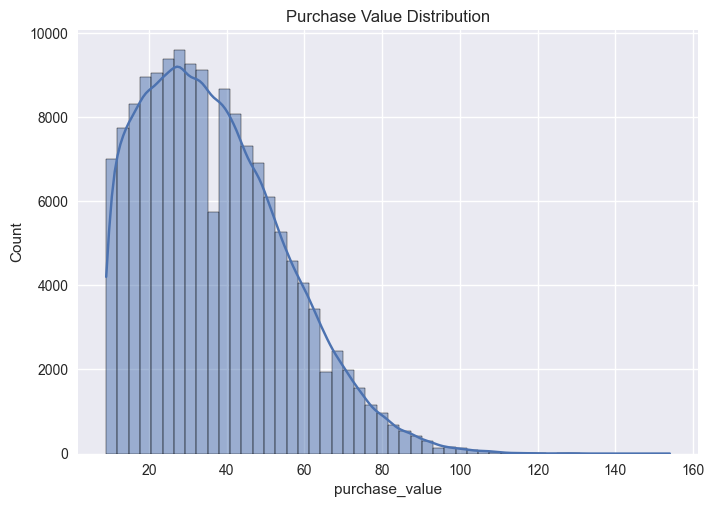

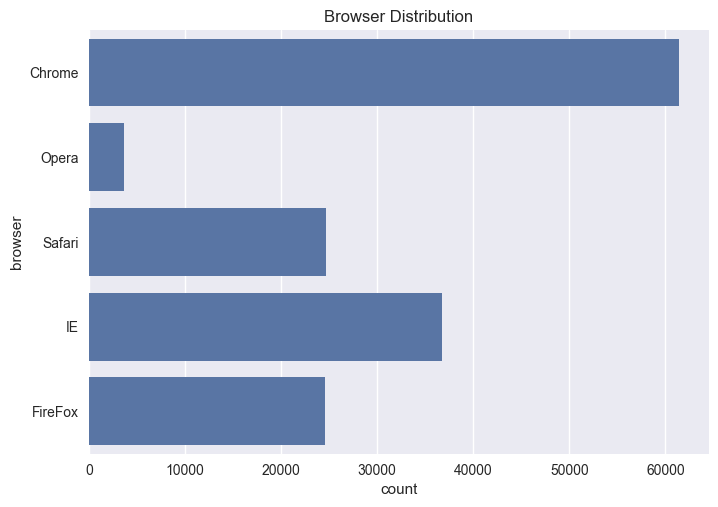

In [7]:
sns.histplot(fraud_df['purchase_value'], bins=50, kde=True)
plt.title("Purchase Value Distribution")
plt.show()
sns.countplot(y='browser', data=fraud_df)
plt.title("Browser Distribution")
plt.show()


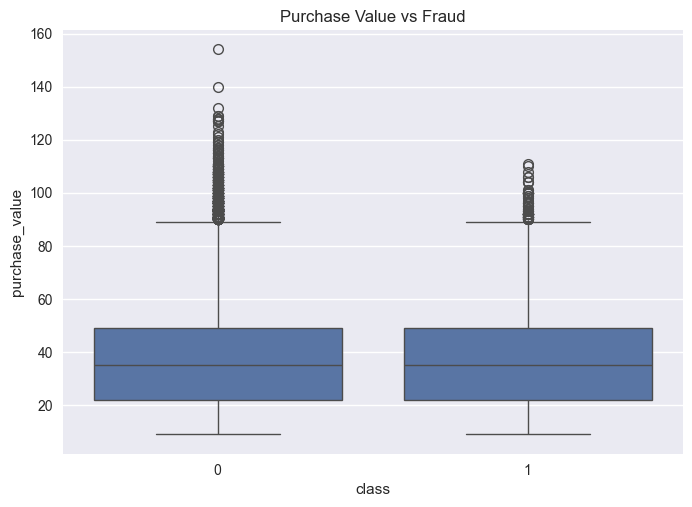

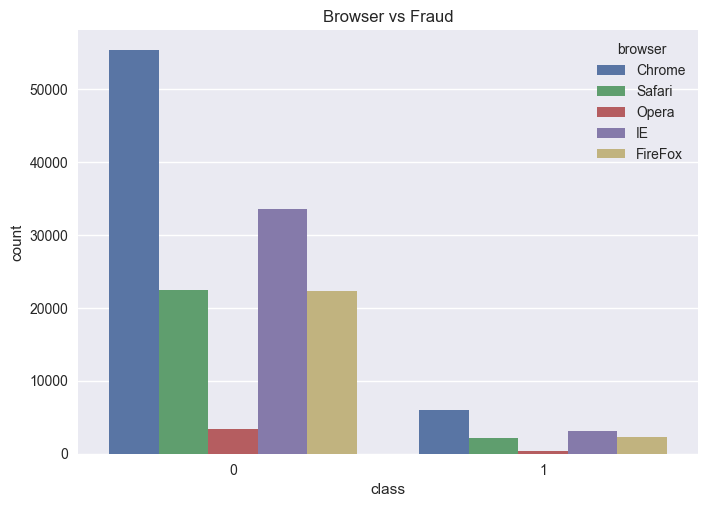

In [8]:
sns.boxplot(x='class', y='purchase_value', data=fraud_df)
plt.title("Purchase Value vs Fraud")
plt.show()
sns.countplot(x='class', hue='browser', data=fraud_df)
plt.title("Browser vs Fraud")
plt.show()


In [10]:
fraud_df['ip_address'].head()
fraud_df['ip_address'].dtype


dtype('float64')

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")


In [13]:
fraud_df = pd.read_csv("../data/raw/Fraud_Data.csv")
ip_df = pd.read_csv("../data/raw/IpAddress_to_Country.csv")

print("Fraud data shape:", fraud_df.shape)
print("IP data shape:", ip_df.shape)


Fraud data shape: (151112, 11)
IP data shape: (138846, 3)


In [14]:
fraud_df.head()
fraud_df.info()
fraud_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [16]:
fraud_df.isnull().sum()
fraud_df.dropna(inplace=True)
fraud_df.duplicated().sum()
fraud_df.drop_duplicates(inplace=True)


In [17]:
fraud_df["signup_time"] = pd.to_datetime(fraud_df["signup_time"])
fraud_df["purchase_time"] = pd.to_datetime(fraud_df["purchase_time"])

fraud_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.7+ MB


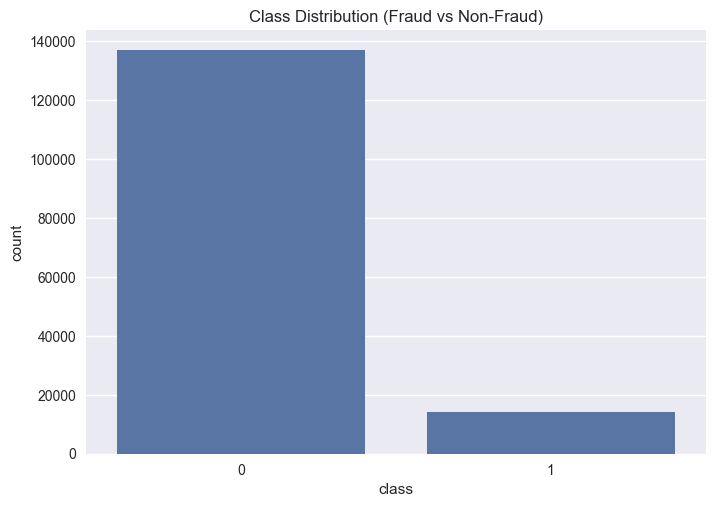

In [18]:
fraud_df["class"].value_counts()
fraud_df["class"].value_counts(normalize=True)
sns.countplot(x="class", data=fraud_df)
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.show()


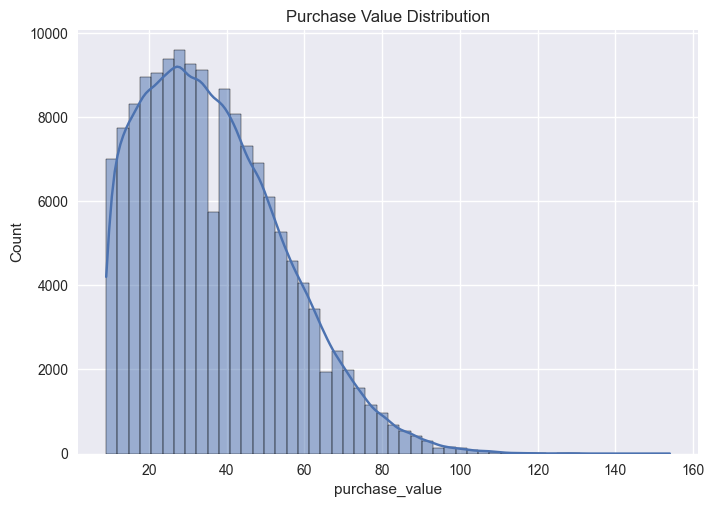

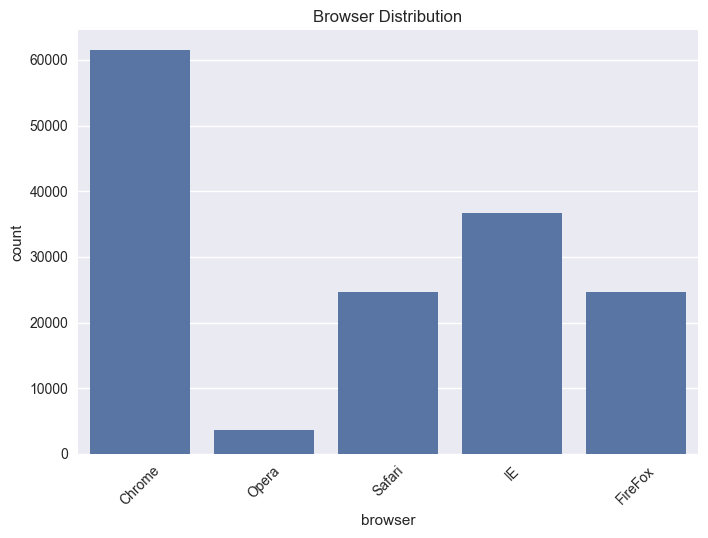

In [19]:
sns.histplot(fraud_df["purchase_value"], bins=50, kde=True)
plt.title("Purchase Value Distribution")
plt.show()
sns.countplot(x="browser", data=fraud_df)
plt.xticks(rotation=45)
plt.title("Browser Distribution")
plt.show()


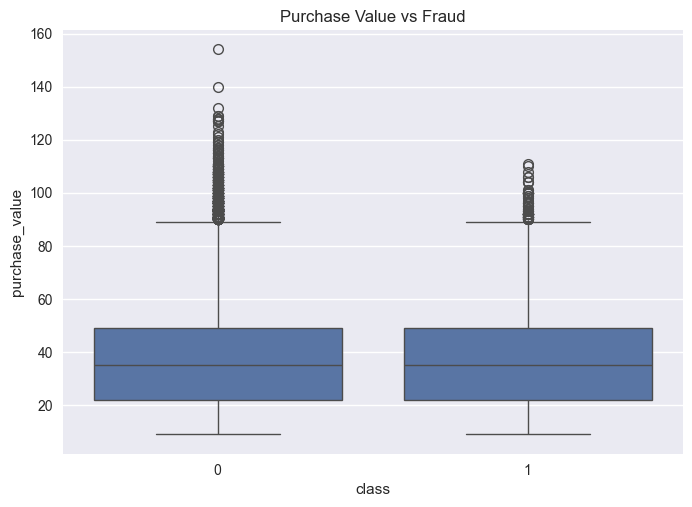

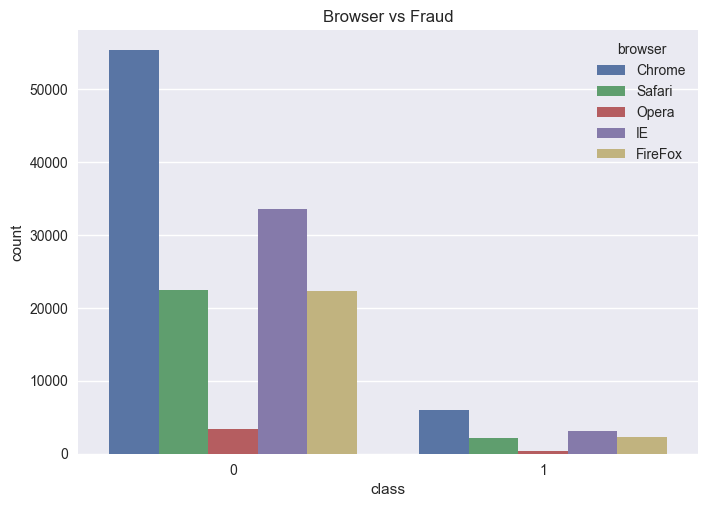

In [20]:
sns.boxplot(x="class", y="purchase_value", data=fraud_df)
plt.title("Purchase Value vs Fraud")
plt.show()
sns.countplot(x="class", hue="browser", data=fraud_df)
plt.title("Browser vs Fraud")
plt.show()


In [21]:
fraud_df["ip_int"] = fraud_df["ip_address"].astype(np.int64)


In [22]:
ip_df["lower_bound_ip_address"] = ip_df["lower_bound_ip_address"].astype(np.int64)
ip_df["upper_bound_ip_address"] = ip_df["upper_bound_ip_address"].astype(np.int64)

ip_df = ip_df.sort_values("lower_bound_ip_address")
fraud_df = fraud_df.sort_values("ip_int")


In [23]:
fraud_df = pd.merge_asof(
    fraud_df,
    ip_df,
    left_on="ip_int",
    right_on="lower_bound_ip_address",
    direction="backward"
)


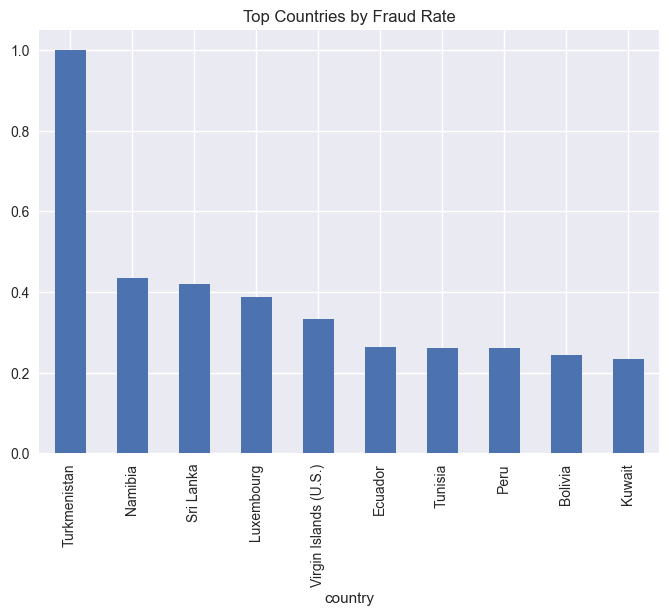

In [25]:
fraud_by_country = (
    fraud_df.groupby("country")["class"]
    .mean()
    .sort_values(ascending=False)
)

fraud_by_country.head(10)

fraud_by_country.head(10).plot(kind="bar")
plt.title("Top Countries by Fraud Rate")
plt.show()



In [26]:
fraud_df["hour_of_day"] = fraud_df["purchase_time"].dt.hour
fraud_df["day_of_week"] = fraud_df["purchase_time"].dt.dayofweek

fraud_df["time_since_signup"] = (
    fraud_df["purchase_time"] - fraud_df["signup_time"]
).dt.total_seconds() / 3600


In [27]:
fraud_df = fraud_df.sort_values(["user_id", "purchase_time"])

fraud_df["txn_count_24h"] = (
    fraud_df.groupby("user_id")["purchase_time"]
    .diff()
    .dt.total_seconds()
    .lt(86400)
    .groupby(fraud_df["user_id"])
    .cumsum()
)


In [28]:
X = fraud_df.drop(columns=["class"])
y = fraud_df["class"]
